#Introduction to Scikit Learn

##K-Neighbours Regressor

###Without Hyperparameter Tuning

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [46]:
X, Y = fetch_california_housing(return_X_y=True) #To assign feature and target into separate variables

In [ ]:
mod = KNeighborsRegressor().fit(X, Y) #Without any scaling process of the data

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1)) 
])       #with the scaling and training process chained into a pipeline

In [44]:
pipe.fit(X, Y)
pred = pipe.predict(X)

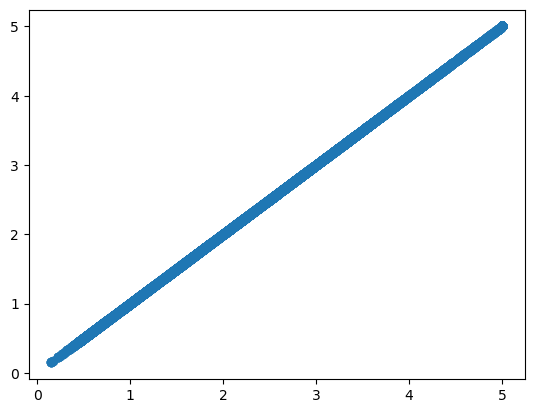

In [48]:
plt.scatter(pred , Y)  #Because numbers of neighbours = 1, it will show a straight line

###With Hyperparameter Tuning and training-testing of a data

In [57]:
from sklearn.model_selection import GridSearchCV #For hyperparameter tuning
import pandas as pd

In [50]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [53]:
mod2 = GridSearchCV(
    estimator= pipe,
    param_grid={ 'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
    cv=3
)

In [59]:
mod2.fit(X, Y)
pd.DataFrame(mod2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022167,0.002462,0.368325,0.025729,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.026202,0.009488,0.705332,0.240977,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.032603,0.009852,0.725011,0.181908,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.018699,0.000485,0.451559,0.035321,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.032396,0.009683,0.922881,0.191940,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.025725,0.009386,0.635633,0.191889,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.019364,0.000459,0.672905,0.273003,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.039673,0.000437,0.964835,0.218714,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.019354,0.000426,0.548337,0.036346,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.034120,0.009252,1.142347,0.038376,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1
